# Tarea 12
## EJERCICIO 1

Implementar método implicito de Euler 

### SOLUCIÓN

Se realiza el método con una ecuación diferencial en particular pero para generalizar el método basta cambiar los datos de F(x,y).

Sea la ecuación diferencial $y'(x)=xy(x) $ con condición inicial $y(1)=1$, se tienen los siguientes datos:

In [70]:
using SymPy

In [88]:
using PyPlot

In [72]:

x,y =symbols("x, y")
u=SymFunction("u")
x0=1
y0=1
F(y,x)=y*x
dsolve(u'(x)-F(u(x),x)) #Esto nos da la solución de la EDO


            2
           x 
           --
           2 
u(x) = C1*e  

In [73]:
out = dsolve(u'(x) - F(u(x),x), x, (u, x0, y0)) #Esto nos da la solución tomando en cuenta las condiciones inciales

               2
              x 
              --
        -1/2  2 
u(x) = e    *e  

De acuerdo a lo anterior: $C_{1}=e^{-\frac{1}{2}}$

Ahora queremos encontrar:
$$x_{n+1}=x_{0}+h$$ 
$$y_{n+1}=y_{n}+hF(y_{n},x_{n})$$

Para ello tomamos en cuenta los siguientes datos (modificables para generalizar):

h=0.2 ;
n=5 ;
$x_{0}$=1
$x_{1}$=1.2
...
$x_{5}$=2

In [74]:
n=5
h = (2-1)/n
xs = zeros(n+1)
ys = zeros(n+1)
xs[1] = x0  
ys[1] = y0
for i in 1:n
  xs[i + 1] = xs[i] + h
  ys[i + 1] = ys[i] + h * F(ys[i], xs[i])
    
end

In [75]:
print(xs,ys) #Esto nos da cada Y segun la X

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0][1.0, 1.2, 1.488, 1.90464, 2.51412, 3.41921]

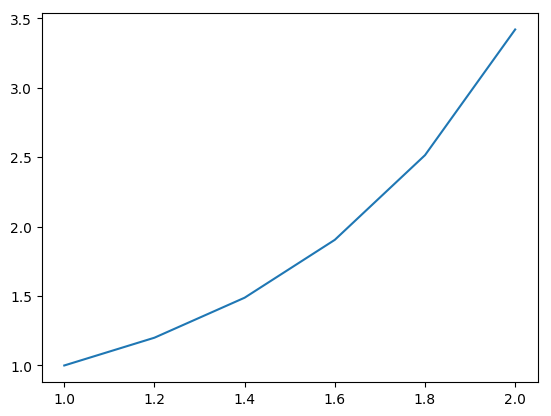

In [135]:
plot(xs, ys); #Graficamos para ver la solución con Euler 

## EJERCICIO 2
Implementar Euler: Regla del punto medio.
### SOLUCIÓN

Para aplicar el método de Euler se definirá cualquier función f, el método se ´puede generalizar modificando los datos:

In [93]:
function f(x,y)
       return 9*x;
end;

In [125]:
function eulermedio(g,x0,t0,tf,h) #Se implementa el método cuyas entradas son g=g(x,y),x0 condicion inciial, t0 tiempo inicial,                                    tf tiempo final, h es le tamaño de cada intervalo.
   
    timeArray = linspace(t0,tf,round((tf-t0)/(h))); #dividmos el intervalo en (tf-ti)/h
    xArray = zeros(length(timeArray)); #creamos un array con el mismo número de entras que y array pero sólo de ceros.
    xArray[1] = x0; #definimos la condición  inicial
   
    for i in 1:length(timeArray)-1
        xArray[i+1] = xArray[i] +h*g(xArray[i]+(h/2)*g(xArray[i],timeArray[i]),timeArray[i]+(h/2));
    end
      return timeArray, xArray; 
end;

Ahora graficamos nuestras soluciones tomando x0=5, t0=0, tf=2 y h=0.1,0.2,03,0.4,0.5

In [126]:
(timeArray1,xArray1)=eulermedio(f, 5.0, 0.0, 2.0, 0.1);
(timeArray2,xArray2)=eulermedio(f, 5.0, 0.0, 2.0, 0.2);
(timeArray3,xArray3)=eulermedio(f, 5.0, 0.0, 2.0, 0.3);
(timeArray4,xArray4)=eulermedio(f, 5.0, 0.0, 2.0, 0.4);
(timeArray5,xArray5)=eulermedio(f, 5.0, 0.0, 2.0, 0.5);

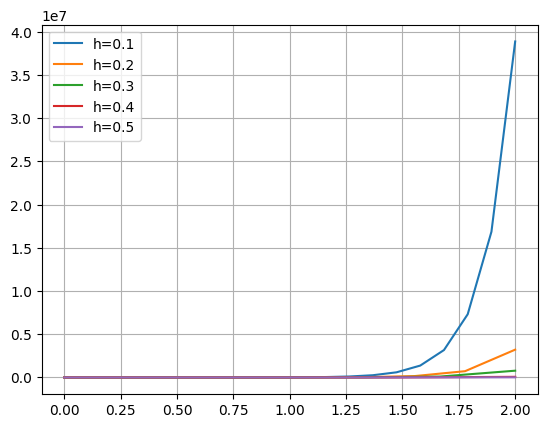

In [127]:
grid("on");
plot(timeArray1,xArray1, label="h=0.1");
plot(timeArray2,xArray2, label="h=0.2");
plot(timeArray3,xArray3, label="h=0.3");
plot(timeArray4,xArray4, label="h=0.4");
plot(timeArray5,xArray5, label="h=0.5");

legend();

## EJERCICIO 3
Implementar método de Runge-Kutta de orden 4.
### SOLUCIÓN

La solución es muy parecida al ejercicio anterior pero con la regla vista en clase para calcular los $k_{i}$


In [131]:
function kutta(g,x0,t0,tf,h) #como en el ejercicio anterior, el método recibe: g=g(x,y),x0 condicion inciial, t0 tiempo                                        inicial,tf tiempo final, h es le tamaño de cada intervalo.
    
    timeArray = linspace(t0, tf, round((tf-t0)/(h)));  #dividmos el intervalo en (tf-ti)/h
    xArray = zeros(length(timeArray)); #creamos un array con el mismo número de entras que y array pero sólo de ceros.
    xArray[1]=x0; #definimos la condición  inicial
    
    for i in 1:length(timeArray)-1 #calculamos los 4 ks:
        k1=g(xArray[i],timeArray[i]);
        k2=g(xArray[i]+(h/2)*k1,timeArray[i]+(h/2));
        k3=g(xArray[i]+(h/2)*k2,timeArray[i]+(h/2));
        k4=g(xArray[i]+h*k3,timeArray[i+1]);
        xArray[i+1] = xArray[i]+(h/6)*(k1+2*k2+2*k3+k4);
    end
    #Se regresan los dos arrays
    return timeArray, xArray; 
end;

## EJERCICIO 4
Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

#### __Ejercicio 1:__
Implementa el método de Euler en `Julia`. Debe ser de la forma `metodo_euler(f,x0,t0,tf,h)`. No olvide que no debe de utilizar `SymPy` de ningún modo en este ejercicio. Naturalmente la función `f` es de dos variables. El _output_ de la función debe ser `return listt,listx`. Otra forma quizá más inteligente de implementarlo es definir desde antes `listt`, y que los inputs del método sean de la forma: `metodo_euler(f,x0,listt)`, naturalmente en `listt` va el tiempo inicial $t_0$ y el paso $h$ que utilizará el método.
* Pruebe su nuevo método resolviendo la ecuación:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, pruebenlo para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.
* Gráfique la solución que obtuvo junto con la curva de la solución exacta, asegúrese de que los puntos de la solución aparezcán unidos en la gráfica para obtener una mejor perspectiva. Haga una gráfica para cada condición inicial, que incluya todos los diferentes pasos usados (excepto $h=1$, este gráfiquelo aparte para cada caso), la idea aquí es ver como nos aproximamos a la solución exacta conforme tomamos $h$'s más pequeños.


### SOLUCIÓN

Nuevamente, la función para el método es similar a las anteriores:

In [138]:
function eulerexplicito(g,x0,t0,tf,h) #el método recibe: g=g(x,y),x0 condicion inciial, t0 tiempo inicial,tf tiempo final, h es                                        el tamaño de cada intervalo.
    
    timeArray = linspace(t0, tf, round((tf-t0)/(h)));  #dividmos el intervalo en (tf-ti)/h
    xArray = zeros(length(timeArray)); #creamos un array con el mismo número de entras que y array pero sólo de ceros.
    xArray[1]=x0; #definimos la condición  inicial
    
    for i in 1:length(timeArray)-1 #implementamos el método según la regla
        xArray[i+1] = xArray[i] +h*g(xArray[i], timeArray[i]);
    end
      return timeArray, xArray; 
end;

Para graficar las soluciones, se deben tomar en cuenta las condiciones que nos da el ejercicio 1 de la tarea 11. 

__PARA $x(0)=1$:__

In [141]:
#Se toma en cuenta: x0=1, t0=0,tf=8 y los 4 valores de h:
(timeArray1,xArray1)=eulerexplicito(f,1.0,0.0,8.0,1.0);
(timeArray2,xArray2)=eulerexplicito(f,1.0,0.0,8.0,0.5);
(timeArray3,xArray3)=eulerexplicito(f,1.0,0.0,8.0,0.2);
(timeArray4,xArray4)=eulerexplicito(f,1.0,0.0,8.0,0.01);

Ahora graficamos las soluciones:

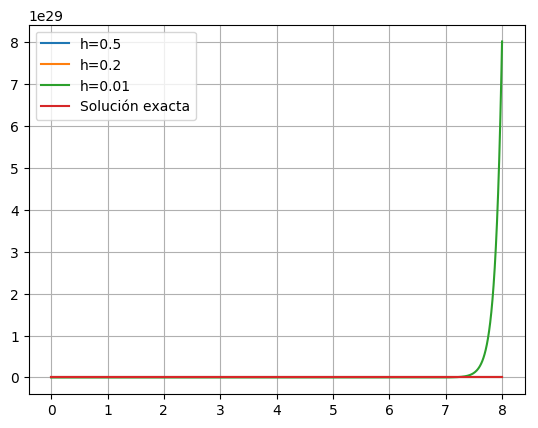

In [142]:
grid("on");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta"); #sabemos la sol, exacta por la tarea 11
legend();

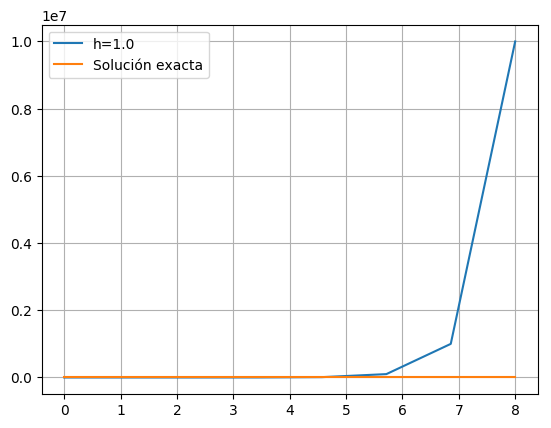

In [143]:
#Como en la tarea 11, graficamos para h=1 y la solución exacta:
grid("on");
plot(timeArray1,xArray1,label="h=1.0");
plot(timeArray4,exp.(-2.5*timeArray4), label="Solución exacta");
legend();

__PARA $x(0)=2$:__

Repetimos todo lo anterior:

In [145]:
(timeArray1,xArray1)=eulerexplicito(f,2.0,0.0,8.0,1.0);
(timeArray2,xArray2)=eulerexplicito(f,2.0,0.0,8.0,0.5);
(timeArray3,xArray3)=eulerexplicito(f,2.0,0.0,8.0,0.2);
(timeArray4,xArray4)=eulerexplicito(f,2.0,0.0,8.0,0.01);

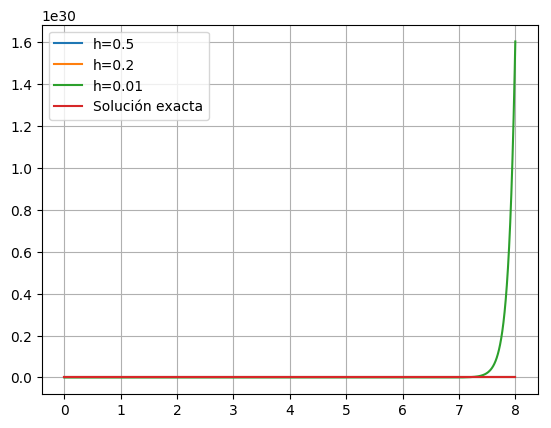

In [146]:
grid("on");
plot(timeArray2, xArray2, label="h=0.5");
plot(timeArray3, xArray3, label="h=0.2");
plot(timeArray4, xArray4, label="h=0.01");
plot(timeArray4, exp.(-2.5*timeArray4), label="Solución exacta");
legend();

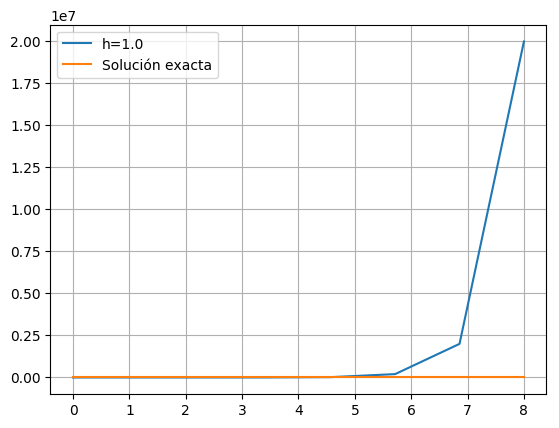

In [147]:
grid("on");
plot(timeArray1,xArray1,label="h=1.0");
plot(timeArray4,exp.(-2.5*timeArray4), label="Solución exacta");
legend();

## EJERCICIO 5
Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

### SOLUCIÓN
Primero definimos la función y su solución exacta:

In [148]:
function g(x,t)
    return (2x-18t)/(1+t);
end;

In [157]:
function sol(t)
    return 4+8*t-5*(t*t);
end;

In [154]:
#Utilizamos la función de punto medio con 4tamaños de subintervalo, para la condición inicial x(0)=4 en g
(timeArray1,xArray1)=eulermedio(g,4.0, 0.0, 8.0, 1.0);
(timeArray2,xArray2)=eulermedio(g,4.0, 0.0, 8.0, 0.8);
(timeArray3,xArray3)=eulermedio(g,4.0, 0.0, 8.0, 0.3);
(timeArray4,xArray4)=eulermedio(g,4.0, 0.0, 8.0, 0.01);


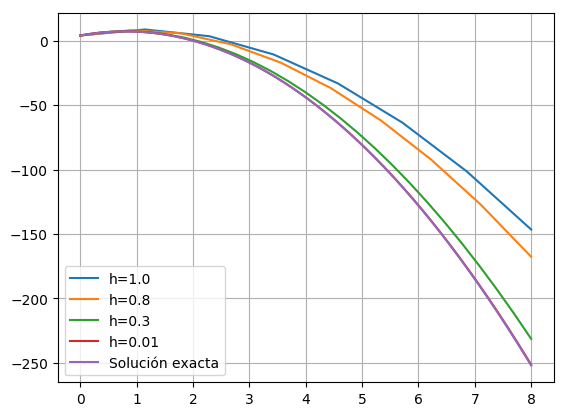

In [158]:
#Se grafica lo anterior:
grid("on");
plot(timeArray1,xArray1, label="h=1.0");
plot(timeArray2,xArray2, label="h=0.8");
plot(timeArray3,xArray3, label="h=0.3");
plot(timeArray4,xArray4, label="h=0.01");
plot(timeArray4, sol.(timeArray4), label="Solución exacta");
legend();

In [159]:
#Ahora lo hacemos para el método Runge-Kutta:
(timeArray1,xArray1)=kutta(g,4.0, 0.0, 8.0, 1.0);
(timeArray2,xArray2)=kutta(g,4.0, 0.0, 8.0, 0.8);
(timeArray3,xArray3)=kutta(g,4.0, 0.0, 8.0, 0.3);
(timeArray4,xArray4)=kutta(g,4.0, 0.0, 8.0, 0.01);


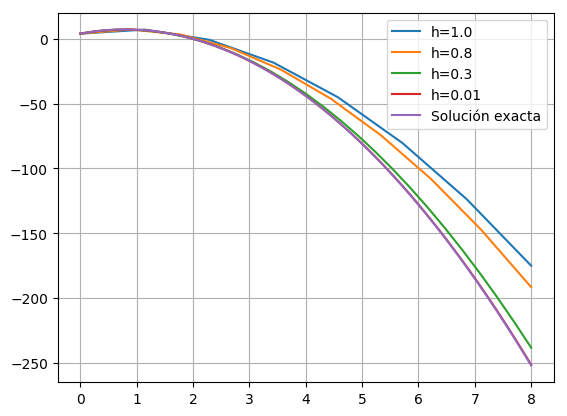

In [160]:
#Graficamos:
grid("on");
plot(timeArray1,xArray1, label="h=1.0");
plot(timeArray2,xArray2, label="h=0.8");
plot(timeArray3,xArray3, label="h=0.3");
plot(timeArray4,xArray4, label="h=0.01");
plot(timeArray4, sol.(timeArray4), label="Solución exacta");
legend();